# Analysis

1. I did the encoding manually as suggested in lesson 4.2.
2. Because the majority of the cities have populations less than 80,000 people, but big cities are skewing the data to the left, I'll remove any cities with populations greater than 80000.
3. The roberry and murder features have a .77 correlation, I will combine those two features to a robbery_murder feature, and then remove the indivual murder and robery features to avoid overfitting.
4.  with all of the above done, these are my numbers from the model, I don't think the Y-intercept is an acceptable number, but I'm not sure.
Coefficients: [[9.94521546e-03 1.67024834e-07 1.08623301e+02 5.13221382e+01 9.20938346e+01]]

Intercept: [25.13328351]

R-squared:
0.7836951292407518

Accuracy: 0.6992546390689116

RMS = 118.7557618546845

5.  After adding PCA into the model these are my ouputs

-0.6272097797924241

Coefficients: [[1.095515]]

Intercept: [7.76923875e-17]

R-squared:-0.6272097797924241

RMS = 608.6581443067461


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.get_option("display.max_rows")
pd.set_option("display.max_rows",999)
dataset = pd.read_csv('table_8.csv')
dataset = dataset[['Population', 'Murder', 'Robbery', 'Propertycrime']]
#Take care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
#fit the imputer
imputer = imputer.fit(dataset[['Population', 'Murder', 'Robbery', 'Propertycrime']])
#eliminate cities with populations greater than 80,000
dataset = dataset[dataset.Population < 80000]
dataset['Population2'] = dataset['Population']**2
murd = []
robb = []
for row in dataset['Murder']:
    if row  > 0:
        murd.append(1)
    else:
        murd.append(0)
for row in dataset['Robbery']:
    if row  > 0:
        robb.append(1)
    else:
        robb.append(0)
se = pd.Series(murd)
dataset['Murdboo'] = se.values
re = pd.Series(robb)
dataset['Robboo'] = re.values





               Population    Murder   Robbery  Propertycrime  Population2  \
Population       1.000000  0.465976  0.640983       0.848001     0.925663   
Murder           0.465976  1.000000  0.769527       0.543209     0.451018   
Robbery          0.640983  0.769527  1.000000       0.735372     0.667875   
Propertycrime    0.848001  0.543209  0.735372       1.000000     0.829640   
Population2      0.925663  0.451018  0.667875       0.829640     1.000000   
Murdboo          0.480698  0.656449  0.503866       0.504961     0.406735   
Robboo           0.463664  0.197871  0.257439       0.431416     0.313040   

                Murdboo    Robboo  
Population     0.480698  0.463664  
Murder         0.656449  0.197871  
Robbery        0.503866  0.257439  
Propertycrime  0.504961  0.431416  
Population2    0.406735  0.313040  
Murdboo        1.000000  0.292107  
Robboo         0.292107  1.000000  


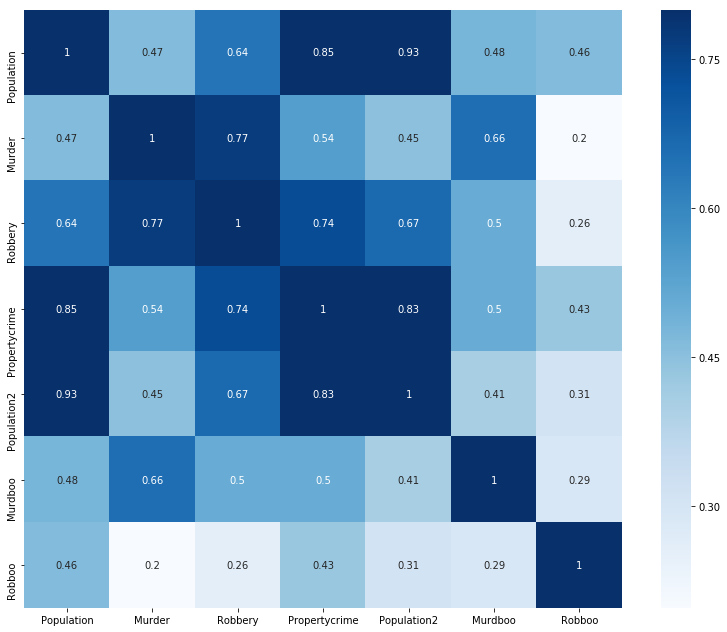

In [2]:
# Make the correlation matrix.
corrmat = dataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [3]:
# Looks like 'Robbery' and 'Murder' can be combined
# 
means = dataset[['Robbery','Murder',]].mean(axis=0)
stds = dataset[['Robbery','Murder',]].std(axis=0)
dataset['Robbery_murder'] = ((dataset[['Robbery','Murder',]] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = dataset.loc[:, ['Robbery','Murder',]]
plotdf['Robbery_murder'] = dataset['Robbery_murder'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                 Robbery    Murder  Robbery_murder
Robbery         1.000000  0.769527        0.940619
Murder          0.769527  1.000000        0.940619
Robbery_murder  0.940619  0.940619        1.000000


                Population    Murder   Robbery  Propertycrime  Population2  \
Population        1.000000  0.465976  0.640983       0.848001     0.925663   
Murder            0.465976  1.000000  0.769527       0.543209     0.451018   
Robbery           0.640983  0.769527  1.000000       0.735372     0.667875   
Propertycrime     0.848001  0.543209  0.735372       1.000000     0.829640   
Population2       0.925663  0.451018  0.667875       0.829640     1.000000   
Murdboo           0.480698  0.656449  0.503866       0.504961     0.406735   
Robboo            0.463664  0.197871  0.257439       0.431416     0.313040   
Robbery_murder    0.588421  0.940619  0.940619       0.679649     0.594765   

                 Murdboo    Robboo  Robbery_murder  
Population      0.480698  0.463664        0.588421  
Murder          0.656449  0.197871        0.940619  
Robbery         0.503866  0.257439        0.940619  
Propertycrime   0.504961  0.431416        0.679649  
Population2     0.406735  0.3130

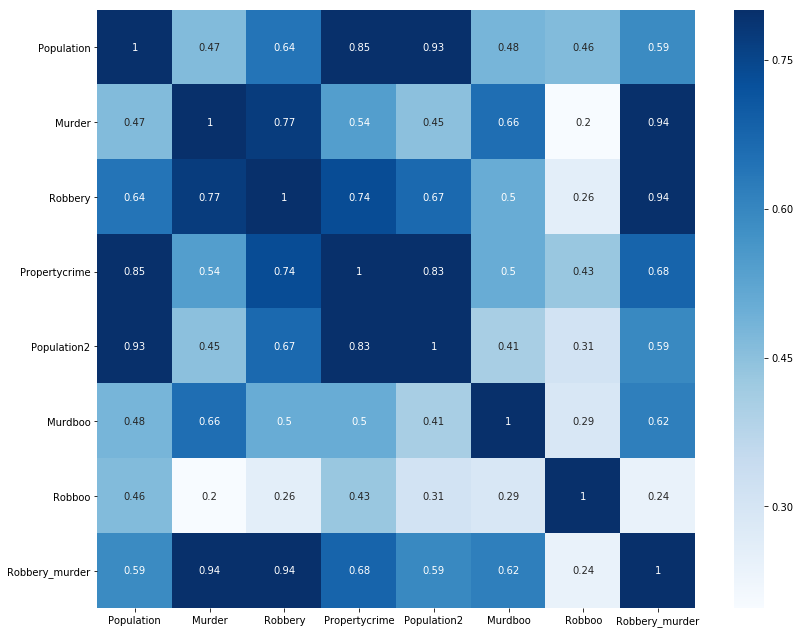

In [4]:
# Make the correlation matrix.
corrmat = dataset.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [5]:
dataset = dataset[['Population', 'Population2', 'Robbery_murder', 'Robboo', 'Murdboo', 'Propertycrime']]

In [6]:
X = dataset[['Population', 'Population2', 'Robbery_murder', 'Murdboo','Robboo']]  #independent variables
y = dataset[['Propertycrime']]     #dependent variable

'''
X[:, *:*] =imputer.transform(X[:, *:*])
#Encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
labelencoder_y = LabelEncoder()
labelencoder_X.fit_transform(X[:,*:*])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
y = labelencoder_y.fit_transform(y)
'''
#Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

pca = PCA(n_components=1)
pca.fit(X_train, y_train)
X_train = pca.transform(X_train)
y_train = pca.transform(y_train)
X_test = pca.transform(X_test)
y_test = pca.transform(y_test)

#Fit the MLR to the Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))
#Predicting the Test set results
y_pred = regressor.predict(X_test)
# Inspect the results.
print('\nCoefficients: \n', regressor.coef_)
print('\nIntercept: \n', regressor.intercept_)
print('\nR-squared:')
print(regressor.score(X_test, y_test))


-0.6272097797924241

Coefficients: 
 [[1.095515]]

Intercept: 
 [7.76923875e-17]

R-squared:
-0.6272097797924241


C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
print(RMSE)

608.6581443067461
